# The Atmosphere

The goal for this notebook is to understand the atmosphere and some of the ways it can impact astronomical obsercations.   We will start at millimeter wavelenghts and then move on to discussing the impact in optical bands.

A good starting point is to play with the APEX atompspheric transmission calculator which can be found here: https://www.apex-telescope.org/sites/chajnantor/atmosphere/transpwv/index_ns.php

Set the frequency range to run from 30 to 600 GHz; set the PWV$_0$ to 0.25; the number of PWVs to plot to 4; delta_PWV to 0.5; and refresh the plot.  The precipital water vapor is quantified as thickness of a layer of water evivelent to the intgral of the water along the line of site in the atmpshere.   The elevation angle should be set to 60 degrees-- this is improtant since it controlls the path lenght through the atmosphere.  This calcualtor assumes an elevation of 5000 m, corresponding to the APEX telesscpe. 

Study this plot and write down the atmospehric bands you believe could be used for observations.

#### List the edges of the possible atmoperhic bands you chose by looking at this plot. 
Discuss which bands are easy and and which are difficult to work in.  Can you observe in all bands in all atmospehric conditions?  Which are more susceptable to variations in PWV?  What is the emission and transmisison in two example bands?

#### Calculate the sensitivity of a detector observing in the band centered at 100 GHz, observing on a PWV = 1 mm day.
your answere goes here.

## Understanding the atmpshere

For the reminder of this notebook we will study what gives rise to this transmisison curve, and other implications of obersrving through the atmopshere.

## The vertical structure of the atmosphere

The "average structure" of the atmosphere is described as a function of altitude z by
temperature and density distributions. The reason we care about the structure of the atmosphere is because of (a) how it emits/absorbs light on its own and (b) what it does to light entering from far beyond Earth. Both of these effects become dominant (or negligible) over various wavelength regimes.

Let us make our own plot of the pressure, density, and temperature as they relate to altitude.  This can be found in Figure 2.1 from the Lena book.  (Availble as pdf from within the U. Chciago network: https://link.springer.com/book/10.1007/978-3-642-21815-6)

We express the pressure as:
$$P(z) = P_0 e^{-z/H}$$

where the scale height $H$ is $\frac{R}{M_o}\frac{<T>}{g}$.  Here $R = 8.32 $JK$^{-1}$mole$^{-1}$ is the gas consstant, $M_0$ = 29g mole$^{-1}$ is the average mass of molecues in air (nitrogen), $g = 9.8$ms$^{-2}$ is the acceleration of gravity, and $<T> = 270$ K is the average temperture. This gives a scale height for the Earth's atmosphere to be $\sim 8$km.

From the ideal gas law, we have:
$$P = \frac{k}{\mu}\rho T$$
where $\mu$ is the mass in one mole.

If we want to plot $T, \rho, and P$ as a function of $z$. we are short one parameter. We need to <i> measure </i> $T$.

Fortunately, this is an easier measurement to make. We use code from https://github.com/bwinkel/pycraf which is an EXCELLENT tool to model the earth's atmospheric structure.

In [8]:
## import the libraries we will need

import sys
!{sys.executable} -m pip install --user pycraf  ## you will have to restart your kernal after this runs the first time to use this code

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as apu
from pycraf import atm
from pycraf import conversions as cnv
%matplotlib inline

This next block creates a grid of points, and then plots the  

In [5]:
# define height grid
heights_grid = np.arange(0, 85, 0.1) * apu.km
# Plot various quantities
heights = heights_grid.to(apu.km).value
# query profile_standard function (returns a namedtuple)
# query profile_standard function
(
temperatures,
pressures,
rho_water,
pressures_water,
ref_indices,
humidities_water,
humidities_ice
) = atm.profile_standard(heights_grid)

#express quantities in cgs units for calculation
h = heights_grid.to(apu.cm).value
P = pressures.to(apu.Ba).value
T = temperatures.to(apu.K).value
k = 1.381e-16 #erg / K
mu = 4.81e-23 # 29AMU in grams
#re-express quantities in units for plot
h = heights_grid.to(apu.km).value
P = pressures.to(apu.bar).value * 1000 #millibar
rho = mu * P / (k * T) #The density 
rho *= (100.)**3 # g m^-3

850


Text(0.45, 0.57, 'Stratopause')

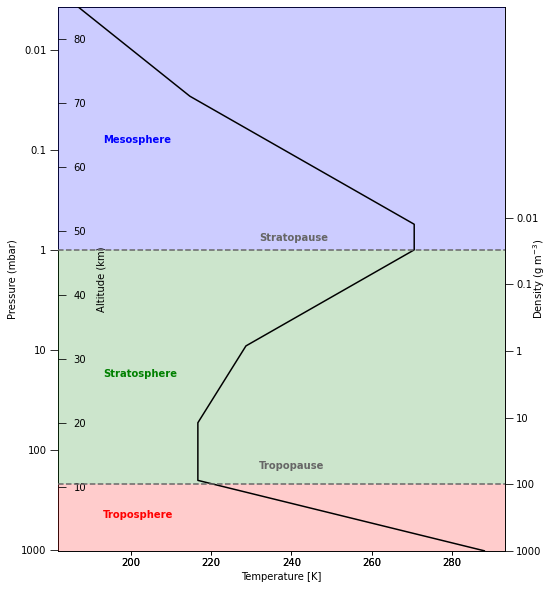

In [6]:

#plot
fig = plt.figure(figsize=(8,10))
ax1 = plt.gca()
ax1.plot(T, np.log10(P), 'b-',alpha=0)
ax1.set_xlabel('Temperature [K]')
ax1.set_ylabel('Pressure (mbar)')
ax1.tick_params(axis='y', direction='out',length=8)
plt.ylim(np.log10(np.max(P)), np.log10(np.min(P)))
locs = [3,2,1,0,-1,-2]
labels = ['1000','100','10','1','0.1','0.01']
plt.yticks(locs, labels)
ax2 = ax1.twinx()
ax2.plot(T, np.log10(rho),'r-', alpha=0)
ax2.set_ylabel('Density (g m$^{-3}$)', labelpad=-10)
plt.ylim(np.log10(np.max(rho)), np.log10(np.min(rho)))
locs = [3,2,1,0,-1,-2]
labels = ['1000','100','10','1','0.1','0.01']
plt.yticks(locs, labels)
ax2.tick_params(axis='y', direction='out', length=8)
ax3 = fig.add_axes(ax1.get_position(), frameon=False)
ax3.plot(T, h, 'k-')
ax3.tick_params(axis='y', direction='in', pad=-28, length=8)
locs = [10,20,30,40,50,60,70,80,90]
labels = ['%2d' % x for x in locs]
plt.yticks(locs, labels)
ax3.set_ylabel('Altitude (km)', labelpad=-48)
plt.ylim(np.min(h), np.max(h))
print(len(h))
i_tropopause = 105
i_stratopause = 470
tropopause = h[i_tropopause]
stratopause = h[i_stratopause]
plt.axhspan(0,tropopause,color='r',alpha=0.2, linewidth=0)
plt.axhspan(tropopause,stratopause,color='g',alpha=0.2, linewidth=0)
plt.axhspan(stratopause,np.max(h),color='b',alpha=0.2, linewidth=0)
plt.axhline(tropopause,color='0.4',ls='--')
plt.axhline(stratopause,color='0.4',ls='--')
ax3.annotate('Troposphere',xy=(0.1,0.06), xycoords='axes fraction', \
color='r', weight='bold')
ax3.annotate('Stratosphere',xy=(0.1,0.32), xycoords='axes fraction', \
color='g', weight='bold')
ax3.annotate('Mesosphere',xy=(0.1,0.75), xycoords='axes fraction', \
color='b', weight='bold')
ax3.annotate('Tropopause',xy=(0.45,0.15), xycoords='axes fraction', \
color='0.4', weight='bold')
ax3.annotate('Stratopause',xy=(0.45,0.57), xycoords='axes fraction', \
color='0.4', weight='bold')

The above plot shows a sloid line which maps the temperature as a function of altitude, pressure, and density.
 
Each colored region is where the temperature change is inverted compared to the prior region and tha "pauses" are where that inversion occurs. The Earth <b> does not</b> a single set of "pauses". It depends on the weather!

#### what are the elevations of ALMA, the Rubin Observatory, SOFIA, and a stratospheric baloon?

note your anwere here.

![image-19.jpg](https://upload.wikimedia.org/wikipedia/commons/3/3e/Jetcrosssection.jpg)
see wikipedia: https://en.wikipedia.org/wiki/Tropopause

The Earth's atmosphere is considered to have an average AMU = 29 (we have used this before), indicating that it is mostly $N_2$. The other constituents include water vapor, carbon dioxide, ozone, methane, NO, and free ions. Each of these can either emit or absorb radiation.

We need to know the temperature, pressure, and density if we are going to quantify the amount of absorption or emission from the above constituents.

In [24]:

_freqs = np.arange(1, 1000, 1)
freq_grid = _freqs * apu.GHz
total_pressure = 1013 * apu.hPa


height1 = .2 * apu.km
temperature1 = 290 * apu.K
w = np.where(heights == height1.value)[0]
temperature1 = temperatures[w[0]]
rho_water1 = rho_water[w[0]]
pressure_water1 = atm.pressure_water_from_rho_water(temperature1, rho_water1)
pressure_dry1 = total_pressure - pressure_water1
atten_dry1, atten_wet1 = atm.atten_specific_annex1(freq_grid, pressure_dry1, pressure_water1, temperature1)

height2 = 4 * apu.km
w = np.where(heights == height2.value)[0]
temperature2 = temperatures[w[0]]
rho_water2 = rho_water[w[0]]
pressure_water2 = atm.pressure_water_from_rho_water(temperature2, rho_water2)
pressure_dry2 = total_pressure - pressure_water2
atten_dry2, atten_wet2 = atm.atten_specific_annex1(freq_grid, pressure_dry2, pressure_water2, temperature2)



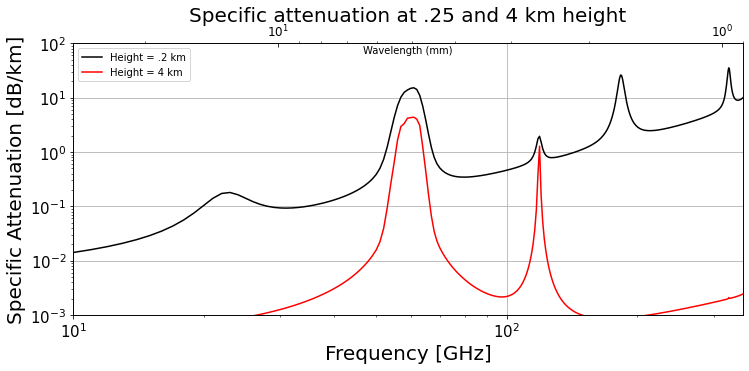

In [25]:
plt.close()
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1) 
ax1.loglog(_freqs, (atten_dry1 + atten_wet1).to(cnv.dB / apu.km).value, 'k-', label='Height = .2 km')
ax1.loglog(_freqs, (atten_dry2 + atten_wet2).to(cnv.dB / apu.km).value, 'r-', label='Height = 4 km')
c=3e8
_freqs=_freqs*10**9
wave=c/_freqs
wave=wave*1000
ax1.set_xlabel('Frequency [GHz]', fontsize=20)
ax1.set_ylabel('Specific Attenuation [dB/km]', color='k', fontsize=20)
ax1.set_ylim([.001, 100])
ax1.set_xlim([10, 350])
ax1.tick_params('x', colors='k', labelsize=15)
ax1.tick_params('y', colors='k', labelsize=15)
ax1.grid()
ax1.legend(*plt.gca().get_legend_handles_labels(), loc='upper left')
ax2=ax1.twiny()
tem=(atten_dry2 + atten_wet2).to(cnv.dB / apu.km).value
tem=tem-20
ax2.loglog(wave, tem, 'w-', label='Height = 4 km')
ax2.set_xlabel('Wavelength (mm)')
ax2.set_ylabel('Specific Attenuation [dB/km]', color='k', fontsize=20)
ax2.set_xlim([29, .9])
ax2.set_ylim([.001, 100])
ax2.xaxis.labelpad=-30
ax2.tick_params('x', colors='k', direction='in', labelsize=12)
ax2.tick_params('y', colors='k', pad=-20, direction='in', labelsize=12)
figure_title = "Specific attenuation at .25 and 4 km height"
plt.text(0.5, 1.08, figure_title,
horizontalalignment='center',
fontsize=20,
transform = ax2.transAxes)
plt.show()

Notice where that water line lives (frequency). Notice the difference height makes in the atmosphere transmission. Notice we are plotting in DECIBELS.

A <b>db</b> of a number is when it ix expressed as 10$\times\ log_{10}$ of the number.

Section 2.2.1 in Len a discusses 4 types of absorption mechanisms (and their responsible molecules) 

The <i> peaks </i> of the attenuations are defined in terms of an optical depth:

$$\begin{array}{rcl}{ \tau }_{i}(\lambda,{z}_{0}) ={ \int \nolimits }_{{z}_{0}}^{\infty }{r}_{ i}(z){\rho }_{0}(z){\kappa }_{i}(\lambda )\mathrm{d}z,& & \\ \end{array}$$

where $\kappa_i$ are the absoprtion coefficients:
$$\begin{array}{rcl}{ \kappa }_{i} = \frac{\sigma {n}_{i}} {{r}_{i}{\rho }_{0}}.& & \\ \end{array}$$

The cross-sections of interactions $\sigma$ come from published data from laboratories which calculate these things. In other words, we look them up.

We also need $\rho_0$ (the mass density of the air) and the mixing ratio $r$, which is just the fraction of the specific component (e.g., water) compared to "dry air".

Depending on how many $i$ components you want to model, we just add everything up and recall that intensity depends on the incident angle to the observing place (i.e., telescope):

$$\begin{array}{rcl} \frac{I({z}_{0})} {{I}_{0}(\infty )} =\exp \left [-\frac{1} {\cos \theta }{\sum }_{i}{\tau }_{i}(\lambda,{z}_{0})\right ],& & \\ \end{array}$$



## Atmospheric Emission
The limit for observing very faint objects from the ground is thus set by the intrinsic emission of the night sky. 

Lena describes the concept of a "rayleigh" as:

$$\rm{1\ rayleigh} = \frac{10^6}{4\pi} \rm{photons\ cm}^{−2}\rm{s}^{−1}\rm{sr}^{−1}=\frac{1.58\times10^{−7}}{\lambda \rm{(nm)}}\ \rm{W\ m}^{−2}\ \rm{sr}^{−1} \tag{1}$$

which is the brightness (in those units) from one million photons per steradian (note the 4\$pi$).

If the source has an intrinsic angular dimension much less than one second of arc, and if it is possible on the ground to reduce the effects of atmospheric turbulence, that is, reduce the solid angle of sky simultaneously observed, the sky background contribution will be greatly diminished. The contrast, and therefore the detection, will then be improved. This is the achievement of adaptive optics.

Table 2.2 in Lena gives some examples of atmospheric emission and their root physical causes.

Lena does an example for $NO_2$ [airglow](https://en.wikipedia.org/wiki/Ionized-air_glow), which covers a wide range of wavelengths in the optical. 

We look at the emission from 1 raleigh distributed in a square arcsecond at 550nm. We simply incorporate the wavelength into equation 1 and take the area fraction of 1 arcsecond. Lena likes to work in microns, so we switch to that unit:

$$\begin{array}{rcl} \frac{1.58 \times 1{0}^{-7}} {550} \times (\frac{2.35 \times 1{0}^{-11}\,\mathrm{sr}}{4\pi}) \times 1{0}^{4} = 0.537 \times 1{0}^{-17}\,\mathrm{W}\,{\mathrm{m}}^{-2}\,\mu {\mathrm{m}}^{-1}\,{\mathrm{arcsec}}^{-2}.& & \\ \end{array}$$

Lena also gives us a zero point to use $3.92\times10^{-8}$ W m$^{-2}$ $\mu$m$^{−1}$.

Using this zeropoint and our definition of magnitude (2.5log$_{10}$ flux), we arrive at 24.6 in this band (which we call <i>V</i>).

This is <i>much dimmer</i> than what is shown in figure 2.9, why?



## Atmospheric Refraction and Dispersion
From Lena Section 2.5:
    
    More important for observation is the fact that the zenith distance θ ′ of a star is deviated from its true value θ. Refraction is a function of the thickness of air traversed, thus, for an atmosphere stratified in parallel planes, it is also a function of the quantity   m=1/cosθ , called the air mass. This effect is weak, but not negligible:   θ′−θ∼−2′′  between 0.3 and 0.8 μm, for θ = 45 ∘ . In addition, there is chromatic dispersion, whence the coloured spreading in images of stars observed far from the zenith. These effects of differential refraction and dispersion cannot be ignored when angular resolution is significantly greater than 1 arcsec, which is the case in high resolution imaging, and more specifically in adaptive optics

## Atmospheric Modeling Example

Have a look at the [LSST atmospheric modeling software](https://github.com/moeyensj/atmo2mags/blob/master/tutorial.ipynb)